<a href="https://colab.research.google.com/github/harsh191/INTERNSHIP-PROJECTS/blob/master/Automated_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


from google.colab import files
import pandas as pd
import io

print("Please upload your dataset (.csv or .xlsx).")

uploaded = files.upload()  # Opens a file picker dialog

# Automatically detect and load CSV or Excel
for filename, filedata in uploaded.items():
    print(f"\n Uploaded file: {filename}")

    if filename.endswith(".csv"):
        df = pd.read_csv(io.BytesIO(filedata))
    elif filename.endswith((".xls", ".xlsx")):
        df = pd.read_excel(io.BytesIO(filedata))
    else:
        raise ValueError(" Unsupported file type. Please upload a CSV or Excel file.")

    print(f"  Dataset '{filename}' loaded successfully!")
    print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    display(df.head())



Please upload your dataset (.csv or .xlsx).


Saving corporate_financials_2019_2024.csv to corporate_financials_2019_2024.csv

 Uploaded file: corporate_financials_2019_2024.csv
  Dataset 'corporate_financials_2019_2024.csv' loaded successfully!
Shape: 360 rows × 12 columns


,date,company,sector,revenue,cost_of_goods_sold,operating_expenses,interest_expense,tax_expense,net_income,assets,liabilities,cash_flow
0,2019-01-31,Alpha Tech Ltd,Technology,1628673.84,845425.84,442860.90,19822.38,80141.18,240423.54,8680166.57,3751436.70,248392.97
1,2019-02-28,Alpha Tech Ltd,Technology,1586779.97,777683.65,416897.40,16483.02,93928.98,281786.93,5468555.66,2673855.95,291177.17
2,2019-03-31,Alpha Tech Ltd,Technology,1776619.21,877695.58,370198.85,24246.60,126119.54,378358.63,6567180.95,2689629.01,377567.11
3,2019-04-30,Alpha Tech Ltd,Technology,1792087.41,870547.49,433185.15,23094.43,116315.09,348945.26,6242808.56,2477786.79,397744.79
4,2019-05-31,Alpha Tech Ltd,Technology,1740213.13,918311.24,352912.08,13478.13,113877.92,341633.76,4924493.45,1799495.08,380620.33


In [3]:
import pandas as pd
import numpy as np

# ---- Step 1: Overview ----
print(" Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Total Duplicates: {df.duplicated().sum()}")

# ---- Step 2: Missing Values Summary ----
missing_summary = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2)
missing_table = pd.DataFrame({
    "Missing Count": missing_summary,
    "Missing %": missing_percent
})
print("\n Missing Value Summary:")
display(missing_table[missing_table["Missing Count"] > 0])

# ---- Step 3: Handle Duplicates ----
if df.duplicated().sum() > 0:
    print(f"\n Found {df.duplicated().sum()} duplicate rows. Removing duplicates...")
    df = df.drop_duplicates().reset_index(drop=True)
    print(f"  Duplicates removed. New shape: {df.shape}")
else:
    print("\n No duplicate rows found.")

# ---- Step 4: Handle Missing Values ----
threshold = 0.4  # drop columns with >40% missing
cols_to_drop = [col for col in df.columns if df[col].isnull().mean() > threshold]
if cols_to_drop:
    print(f"\n Dropping columns with >40% missing values: {cols_to_drop}")
    df = df.drop(columns=cols_to_drop)

for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype in ['float64', 'int64']:
            # Use the recommended method for filling missing values
            df[col] = df[col].fillna(df[col].median())
        else:
            # Use the recommended method for filling missing values
            df[col] = df[col].fillna(df[col].mode()[0])


print("\n Missing values handled successfully.")
print(f"Dataset shape after missing-value treatment: {df.shape}")

# ---- Step 5: Outlier Detection & Treatment (IQR Method) ----
numeric_cols = df.select_dtypes(include=[np.number]).columns

outlier_info = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
    outlier_info[col] = outliers

    # Cap outliers (replace with boundary values)
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

print("\n Outlier Detection Summary (before capping):")
display(pd.DataFrame.from_dict(outlier_info, orient='index', columns=['Outlier Count']).sort_values('Outlier Count', ascending=False))

print(" Outliers capped using IQR method.")
print(f"Final cleaned dataset shape: {df.shape}")

# ---- Step 6: Verification ----
print("\n Verification Summary:")
print(f"Remaining Missing Values: {df.isnull().sum().sum()}")
print(f"Remaining Duplicates: {df.duplicated().sum()}")
print(f"Numeric Columns Cleaned: {len(numeric_cols)}")

 Dataset Overview:
Shape: (360, 12)
Total Duplicates: 0

 Missing Value Summary:


,Missing Count,Missing %



 No duplicate rows found.

 Missing values handled successfully.
Dataset shape after missing-value treatment: (360, 12)

 Outlier Detection Summary (before capping):


,Outlier Count
cost_of_goods_sold,2
cash_flow,2
tax_expense,2
liabilities,2
net_income,2
revenue,0
operating_expenses,0
interest_expense,0
assets,0


 Outliers capped using IQR method.
Final cleaned dataset shape: (360, 12)

 Verification Summary:
Remaining Missing Values: 0
Remaining Duplicates: 0
Numeric Columns Cleaned: 9


In [4]:
summary = {
    "shape": df.shape,
    "columns": list(df.columns),
    "missing_values": df.isnull().sum().to_dict(),
    "data_types": df.dtypes.astype(str).to_dict(),
    "descriptive_stats": df.describe(include="all").transpose()
}
summary["shape"], summary["missing_values"]


((360, 12),
 {'date': 0,
  'company': 0,
  'sector': 0,
  'revenue': 0,
  'cost_of_goods_sold': 0,
  'operating_expenses': 0,
  'interest_expense': 0,
  'tax_expense': 0,
  'net_income': 0,
  'assets': 0,
  'liabilities': 0,
  'cash_flow': 0})

 Numeric columns detected: 9
 Categorical columns detected: 3


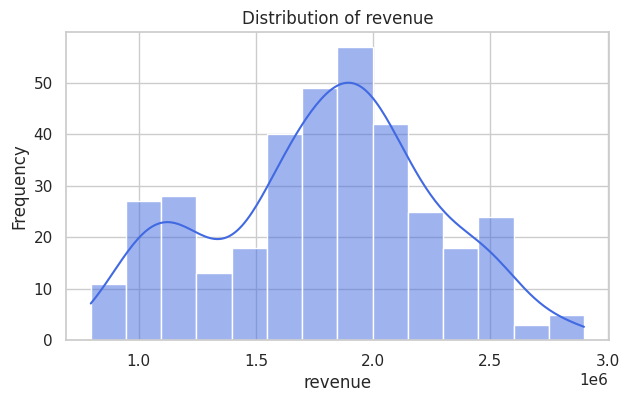

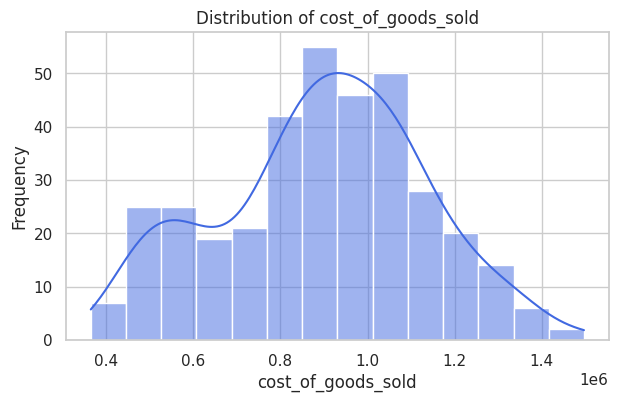

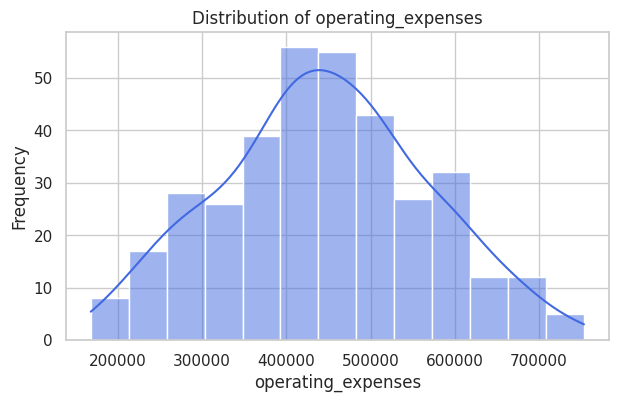

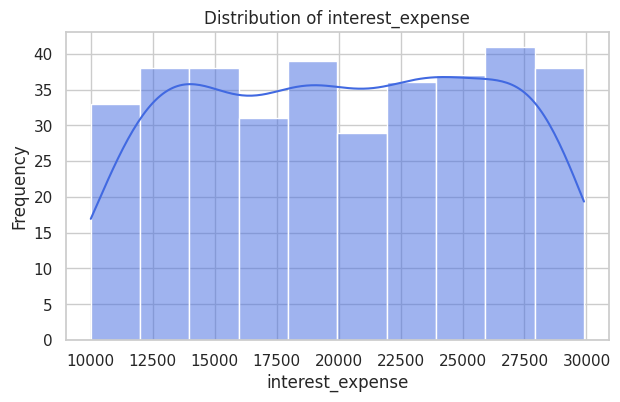

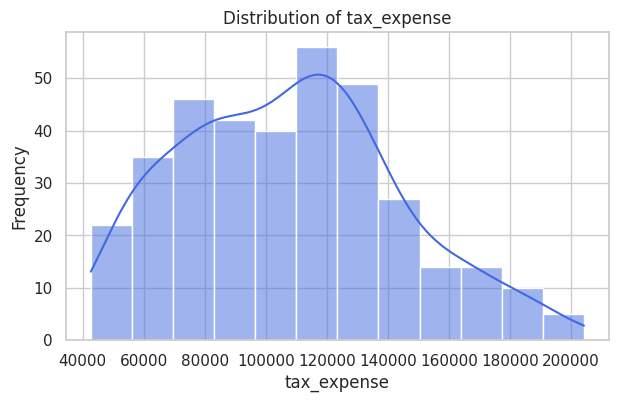

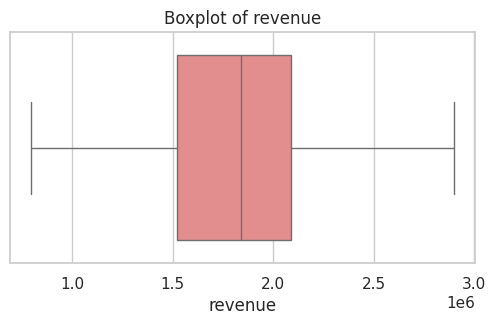

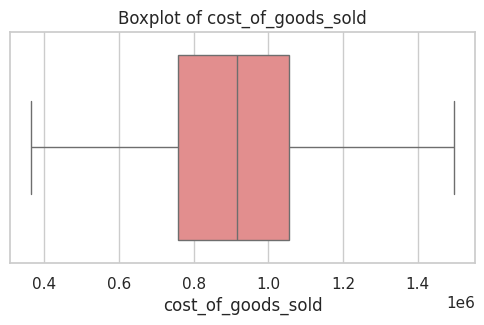

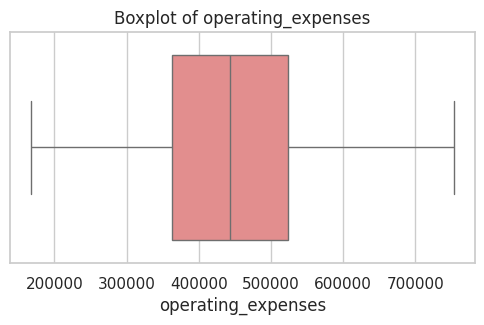

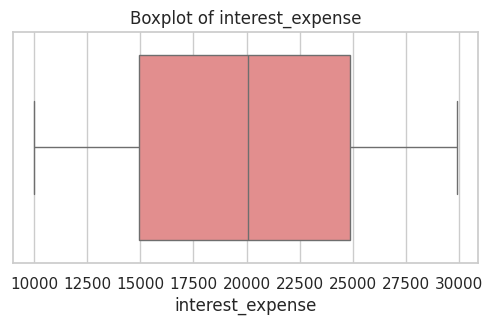

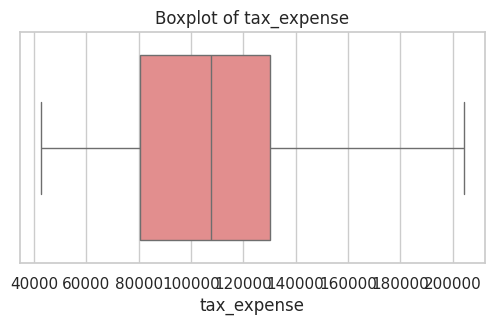

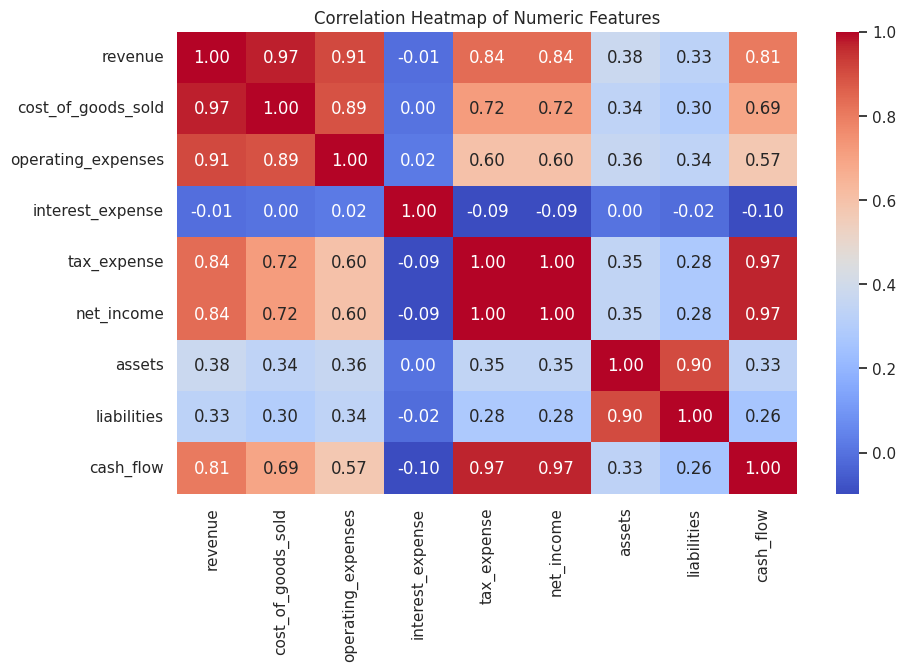

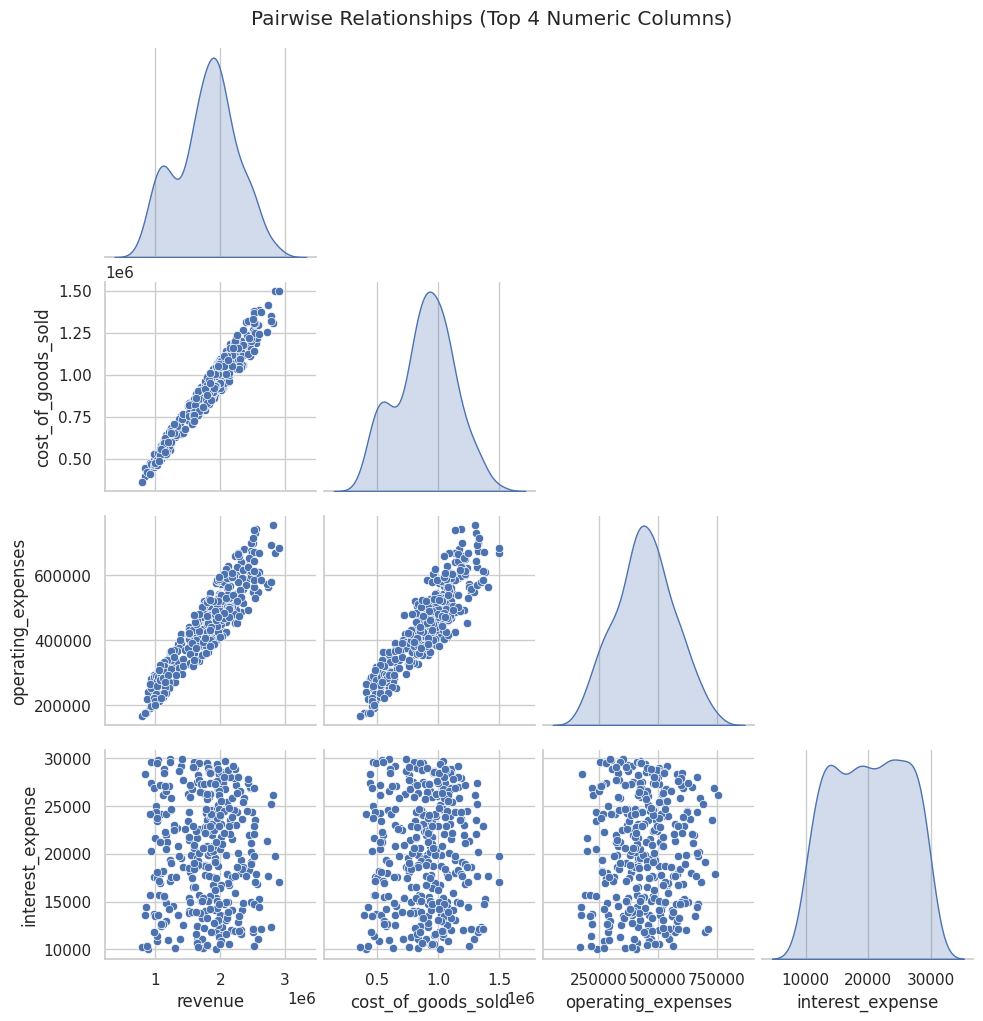

/tmp/ipython-input-1554462027.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="crest", order=df[col].value_counts().index)


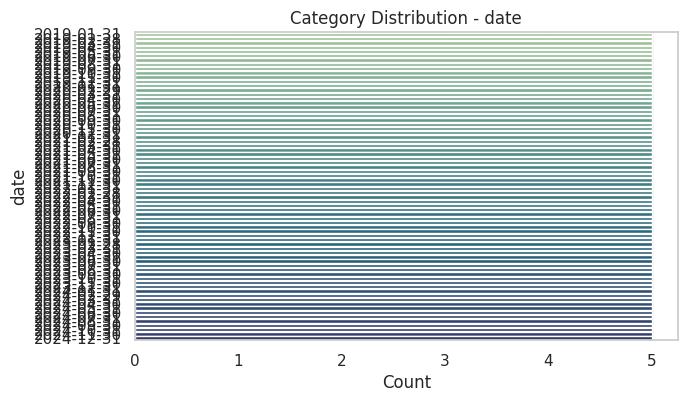

/tmp/ipython-input-1554462027.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="crest", order=df[col].value_counts().index)


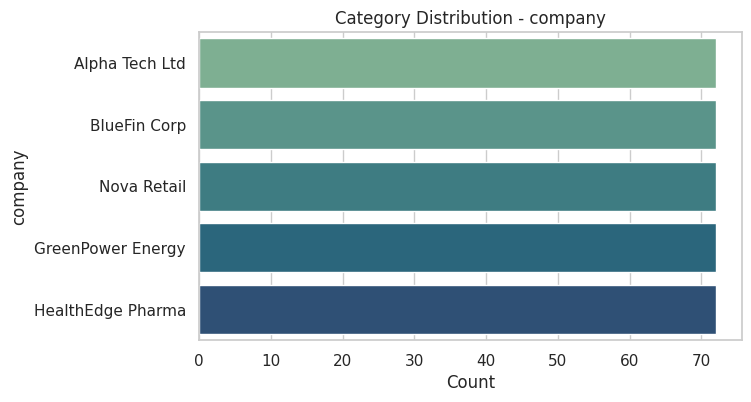

/tmp/ipython-input-1554462027.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="crest", order=df[col].value_counts().index)


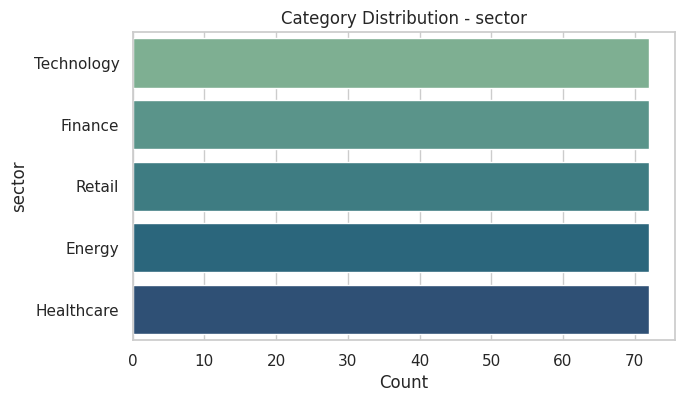

/tmp/ipython-input-1554462027.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat], y=df[num], palette="viridis")


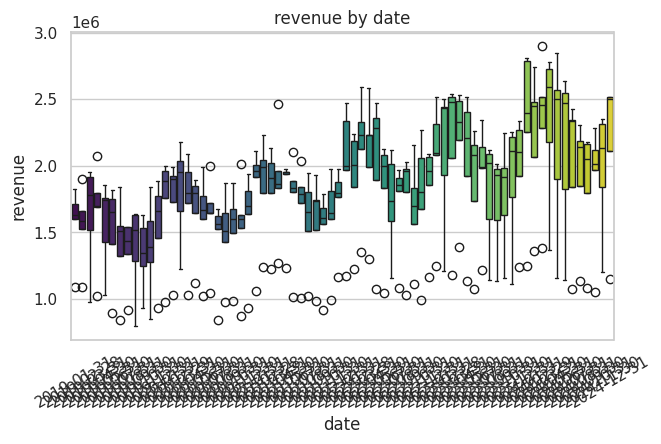

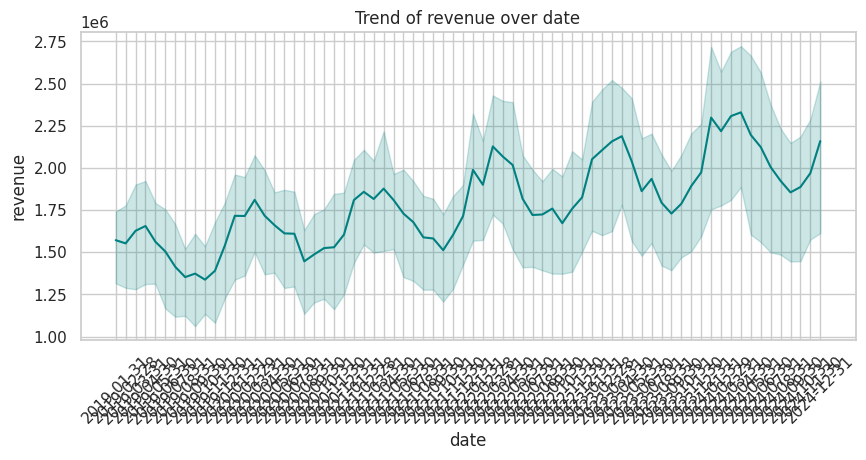

 All plots generated successfully!


In [5]:

# Automated Visualization Suite for EDA

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print(f" Numeric columns detected: {len(numeric_cols)}")
print(f" Categorical columns detected: {len(categorical_cols)}")

# ---------- 1️⃣ Distribution Plots ----------
for col in numeric_cols[:5]:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, color="royalblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# ---------- 2️⃣ Boxplots for Outlier Visualization ----------
for col in numeric_cols[:5]:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color="lightcoral")
    plt.title(f"Boxplot of {col}")
    plt.show()

# ---------- 3️⃣ Correlation Heatmap ----------
plt.figure(figsize=(10,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# ---------- 4️⃣ Pairplot (Relationships between top features) ----------
if len(numeric_cols) >= 3:
    sns.pairplot(df[numeric_cols[:4]], diag_kind="kde", corner=True)
    plt.suptitle("Pairwise Relationships (Top 4 Numeric Columns)", y=1.02)
    plt.show()

# ---------- 5️⃣ Categorical Count Plots ----------
for col in categorical_cols[:3]:
    plt.figure(figsize=(7,4))
    sns.countplot(y=df[col], palette="crest", order=df[col].value_counts().index)
    plt.title(f"Category Distribution - {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

# ---------- 6️⃣ Numeric vs Categorical Relationship ----------
if len(categorical_cols) > 0 and len(numeric_cols) > 0:
    cat = categorical_cols[0]
    num = numeric_cols[0]
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[cat], y=df[num], palette="viridis")
    plt.title(f"{num} by {cat}")
    plt.xticks(rotation=30)
    plt.show()

# ---------- 7️⃣ Trend Plot (If 'date' or 'year' exists) ----------
date_cols = [col for col in df.columns if "date" in col.lower() or "year" in col.lower()]
if len(date_cols) > 0:
    col = date_cols[0]
    num = numeric_cols[0]
    plt.figure(figsize=(10,4))
    df_sorted = df.sort_values(col)
    sns.lineplot(x=df_sorted[col], y=df_sorted[num], color="teal")
    plt.title(f"Trend of {num} over {col}")
    plt.xticks(rotation=45)
    plt.show()

print(" All plots generated successfully!")



In [6]:

import google.generativeai as genai


from google.colab import userdata
gemini_api_key = userdata.get('GEMINI_API_KEY')

genai.configure(api_key=gemini_api_key)

model_name = "models/gemini-2.5-flash"
gemini_model = genai.GenerativeModel(model_name)

print("Gemini connected successfully to:", model_name)



Gemini connected successfully to: models/gemini-2.5-flash


In [7]:
response = gemini_model.generate_content("Give me one line about automated EDA using AI.")
print(response.text)


AI-driven automated EDA intelligently unearths critical insights and hidden patterns from complex datasets with unprecedented speed.


In [8]:
from google.colab import files, userdata
import google.generativeai as genai
print("\n Generating AI Insights with Gemini …")

gemini_api_key = userdata.get('GEMINI_API_KEY')
if not gemini_api_key:
    print(" No Gemini API key found. Add it via Tools → User Data as GEMINI_API_KEY.")
else:
    genai.configure(api_key=gemini_api_key)
    gemini_model = genai.GenerativeModel('gemini-2.5-flash')

    summary = {
        "shape": df.shape,
        "data_types": df.dtypes.astype(str).to_dict(),
        "missing_values": df.isnull().sum().to_dict(),
        "descriptive_stats": df.describe().round(2)
    }

    prompt = f"""
    Dataset columns: {', '.join(df.columns)}
    Dataset shape: {summary['shape']}
    Data types: {summary['data_types']}
    Missing values: {summary['missing_values']}
    Descriptive statistics: {summary['descriptive_stats'].to_markdown()}
    Outlier info (before capping): {outlier_info}
    Generate 5 key EDA insights about this dataset.
    """

    try:
        response = gemini_model.generate_content(prompt)
        print("\n Key EDA Insights:")
        print(response.text)
    except Exception as e:
        print(f" Error generating insights: {e}")


 Generating AI Insights with Gemini …

 Key EDA Insights:
Here are 5 key EDA insights about this dataset:

1.  **Consistent Financial Performance and Healthy Profitability:** The close proximity of mean and median values for most financial metrics (e.g., `revenue`, `net_income`, `operating_expenses`) suggests a relatively consistent financial performance across the companies. On average, companies generate a healthy profit margin, with a mean `net_income` of approximately $323K against a mean `revenue` of $1.79M, indicating an average profitability of about 18%.

2.  **Strong Financial Health with High Asset-to-Liability Ratio:** The companies in the dataset demonstrate strong financial health, with average `assets` ($8.37M) significantly outweighing average `liabilities` ($3.78M). This results in an average asset-to-liability ratio of approximately 2.2:1, suggesting a robust financial structure and lower financial risk for the entities observed.

3.  **High Efficiency in Cash Generat

In [9]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Automated EDA Report", explorative=True)
profile.to_file("eda_report.html")
files.download("eda_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 66.14it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>